# Credit Card Customer Segmentation

## Objective

__To identify  different  segments  in  the  existing  customer  based  on  their spending patterns as well as past interaction with the bank__

## Data Description

__Data is of various customers of a bank with their credit limit, the total number of credit cards  the  customer  has,  and  different  channels  through  which  customer  has contacted  the  bank  for  any  queries,  different  channels  include  visiting  the  bank, online and through a call centre.__

## Code

In [1]:
# account for/ignore version based warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries, modules

import numpy as np
import pandas as pd
import random
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# visualization libraries, modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

In [3]:
# read credit card data from the excel file
# I have created two identical dataframes to apply different tranformations for each

card_data = pd.read_excel("Credit Card Customer Data.xlsx")
card_data2 = pd.read_excel("Credit Card Customer Data.xlsx")

In [4]:
# confirming conversion of the excel file into a Pandas DataFrame

type(card_data)

pandas.core.frame.DataFrame

In [5]:
# check for the datatyes of each column

card_data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [6]:
# check the shape of the dataframe

card_data.shape

(660, 7)

In [7]:
# read into the values in each column of the dataframe

card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
# print the first 5 rows of the dataframe to observe the data briefly

card_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [9]:
# describe the values in each column of the data and look for possible outliers, error values

card_data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


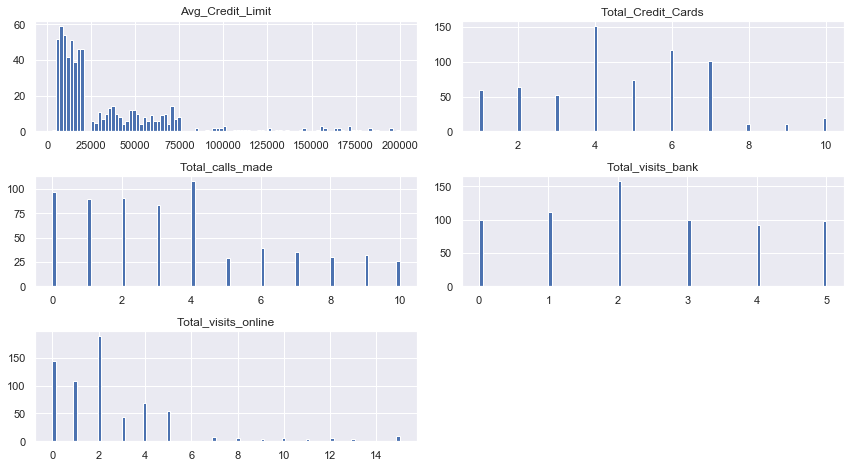

In [10]:
# visualize the distribution of each variable through histograms

columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
card_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

plt.tight_layout()

### We observe a significant difference in range of values of the Avg_Credit_Limit relative to all other columns

### We also notice outliers primarily in the case of Avg_Credit_Limit

### Also, columns Total_calls_made and Total_visits_online are skewed

### We need to focus on the columns plotted above primarily

In [11]:
# Columns Sl_no and Customer Key are dropped as they do not influence our customer data as required

card_data = card_data.drop('Sl_No', axis=1)
card_data = card_data.drop('Customer Key', axis=1)

card_data2 = card_data2.drop('Sl_No', axis=1)
card_data2 = card_data2.drop('Customer Key', axis=1)

In [12]:
card_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [13]:
card_data2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


### Lets try to read into the data with the help of bivariate analysis 

In [14]:
card_data.corr(method='kendall')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.326996,-0.492532,-0.373968,0.310855,1.000000


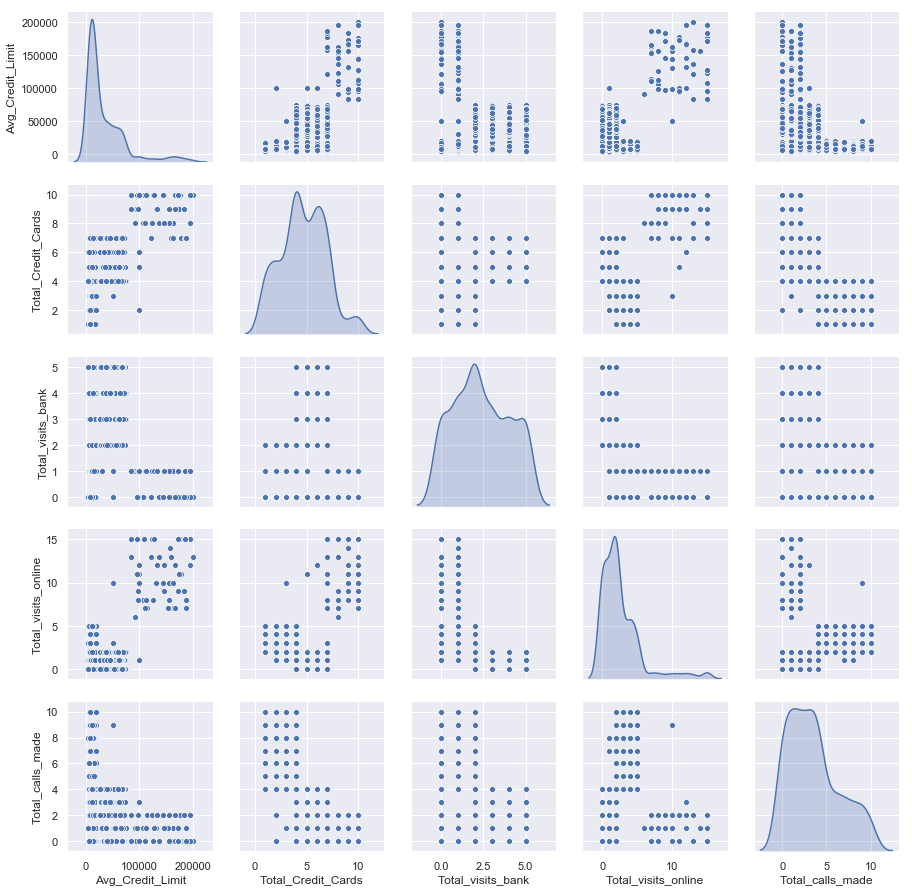

In [15]:
sns.pairplot(card_data, diag_kind='kde')

In [16]:
# We observe from the kde plots that
# Avg_Credit_Limit largely has 3 clusters
# Total_Credit_Cards seem to have 4 clusters

# There seem to be atleast 3 clusters in each of Total_visits_bank, Total_visits_online and Total_calls_made
# These however are not clearly seperated and are likely to have overlaps

### Let's now look at the box plots of these columns to better understand the outliers

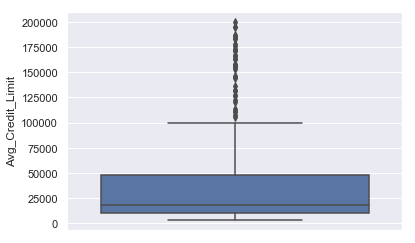

In [17]:
sns.boxplot(y = card_data['Avg_Credit_Limit'])

### While there seem to be a significant number of outliers, they seem to be evenly spread

### Hence, I'll be leaving them as it is in one dataframe while taking the logarithmic transform for the other

In [18]:
card_data2['Avg_Credit_Limit'] = np.log(card_data2['Avg_Credit_Limit'])

In [19]:
card_data2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,11.512925,2,1,1,0
1,10.819778,3,0,10,9
2,10.819778,7,1,3,4
3,10.308953,5,1,1,4
4,11.512925,6,0,12,3


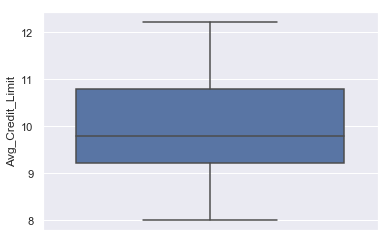

In [20]:
sns.boxplot(y = card_data2['Avg_Credit_Limit'])

### We observe the same column with transformed values and no outliers

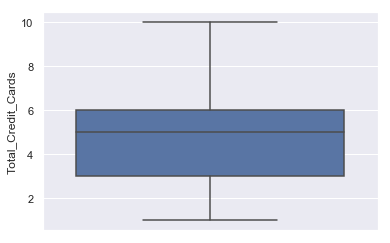

In [21]:
sns.boxplot(y = card_data['Total_Credit_Cards'])

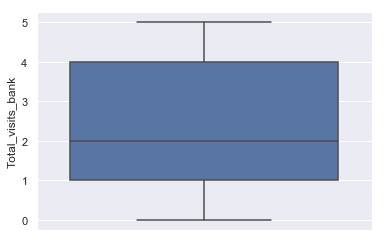

In [22]:
sns.boxplot(y = card_data['Total_visits_bank'])

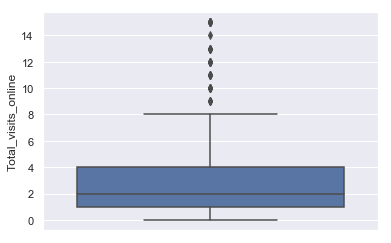

In [23]:
sns.boxplot(y = card_data['Total_visits_online'])

### The outliers seem to be evenly spread in this case as well

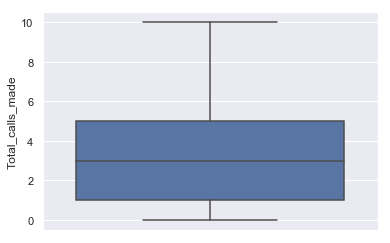

In [24]:
sns.boxplot(y = card_data['Total_calls_made'])

### The boxplot gives us an idea of the skewness again as observed in the pair plots

### Let's also try to normalise all the columns with our first dataframe

In [25]:
from scipy.stats import zscore

card_data_scaled = card_data.apply(zscore)
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### Let us now try to create clusters from the data we have prepared

In [26]:
# We want to consider different cases in terms of number of clusters

cluster_range1 = range(1,15)
cluster_errors1 = []
for num_clusters in cluster_range1:
    clusters1 = KMeans(num_clusters, n_init = 5)
    clusters1.fit(card_data_scaled)
    labels1 = clusters1.labels_
    centroids1 = clusters1.cluster_centers_
    cluster_errors1.append(clusters1.inertia_)

clusters_df1 = pd.DataFrame({"num_clusters": cluster_range1, "cluster_errors": cluster_errors1})
clusters_df1[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,2040.989816
2,3,933.043749
3,4,780.773690
4,5,704.600065
5,6,653.808822
6,7,605.403558
7,8,567.454382
8,9,547.177987
9,10,510.606244


In [27]:
# We want to consider different cases in terms of number of clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(card_data2)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,16512.947217
1,2,9835.291763
2,3,4496.869798
3,4,3879.324102
4,5,3271.019105
5,6,2969.082282
6,7,2833.641015
7,8,2522.957407
8,9,2405.497676
9,10,2283.464470


### Let's now look at an elbow plot of the same

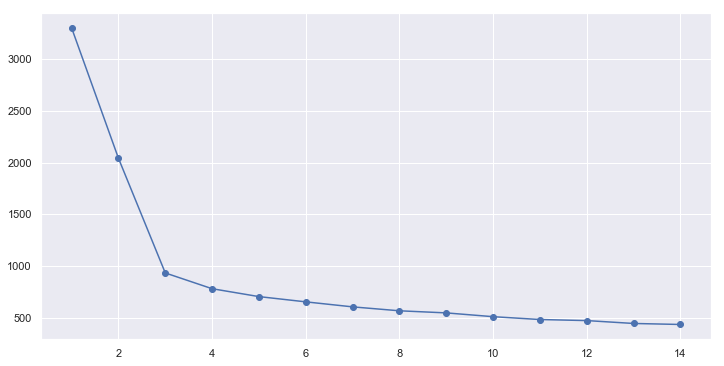

In [28]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df1.num_clusters, clusters_df1.cluster_errors, marker = "o" )

In [29]:
# We could see a significant bend at 3 but there is a further drop to 4 and 5, so let us create 5 custers as well as 3 initially

# 5 clusters
kmeans = KMeans(n_clusters=5, n_init = 5, random_state=7)
kmeans.fit(card_data_scaled)

# 3 clusters
kmeans2 = KMeans(n_clusters=3, n_init = 5, random_state=7)
kmeans2.fit(card_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [30]:
# Check the number of data in each cluster

labels1 = kmeans.labels_
counts1 = np.bincount(labels1[labels1>=0])
print(counts1)

labels2 = kmeans2.labels_
counts2 = np.bincount(labels2[labels2>=0])
print(counts2)

[108 196 190 116  50]
[386 224  50]


In [31]:
# let us check the centers in each group for 5 clusters

centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(card_data2))
centroid_df.transpose()

,0,1,2,3,4
Avg_Credit_Limit,-0.586882,0.044843,-0.089048,-0.604096,2.831764
Total_Credit_Cards,-1.048326,0.390067,0.356795,-1.070140,1.862226
Total_visits_bank,-1.002414,0.056341,1.295713,-0.807582,-1.105763
Total_visits_online,0.377332,-0.563143,-0.543901,0.272409,2.827319
Total_calls_made,1.749565,-0.531621,-0.575064,0.588132,-0.874330


In [32]:
# let us check the centers in each group for 3 clusters

centroids2 = kmeans2.cluster_centers_
centroid_df2 = pd.DataFrame(centroids2, columns = list(card_data2))
centroid_df2.transpose()

,0,1,2
Avg_Credit_Limit,-0.021062,-0.595796,2.831764
Total_Credit_Cards,0.373690,-1.059623,1.862226
Total_visits_bank,0.666395,-0.901518,-1.105763
Total_visits_online,-0.553672,0.322997,2.827319
Total_calls_made,-0.553005,1.148109,-0.874330


In [33]:
# We can start to observe clear distinctions among the cluster
# Cluster 2 has a large credit limit and a large number of credit cards
# In terms of service, 
# cluster 0 has the largest number of bank visits
# cluster 2 has the largest number of online visits 
# cluster 1 has made a large number of calls 

In [34]:
# Add cluster number to original credit card data

predictions = kmeans.predict(card_data_scaled)
predictions
card_data_scaled["group"] = predictions
card_data_scaled['group'] = card_data_scaled['group'].astype('category')
card_data_scaled.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
dtype: object

In [35]:
predictions

array([1, 0, 1, 1, 4, 0, 4, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3,
       0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3,
       0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3,
       3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,

In [36]:
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EA801467B8>,
      dtype=object)

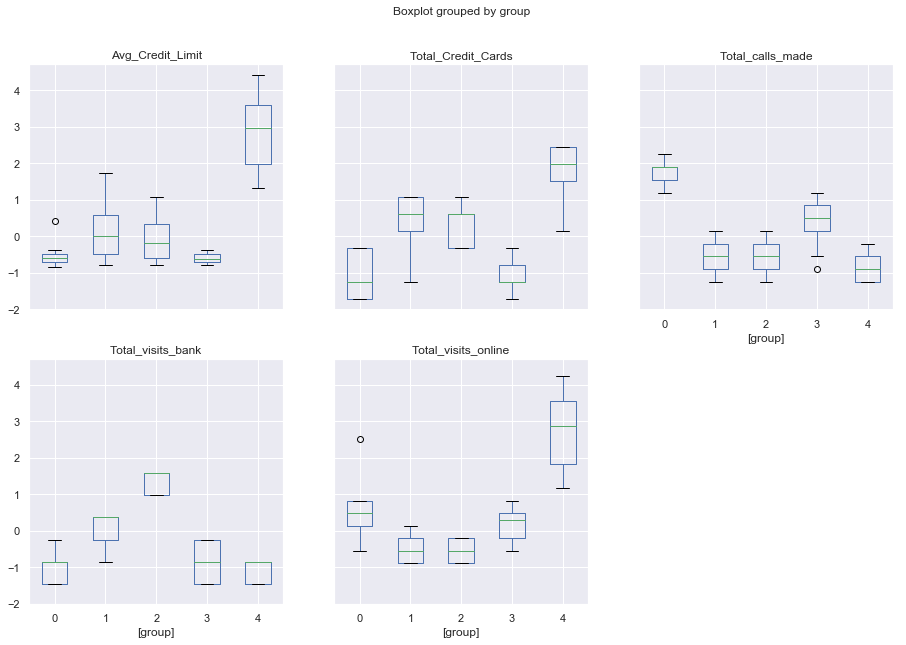

In [37]:
# Visualize the centers

card_data_scaled["group"] = predictions
card_data_scaled.boxplot(by = 'group',  layout=(2,3), figsize=(15, 10))

### Here clear distinctions can be made as well

### A few clear observartions that can be made here are: 

Cluster 4 which has had customers make the largest number of online visits, has a high credit card limit as well as a large number of credit cards

Clusters 0 and 3 which has had customers make the largest number of calls, has a low average credit card limit as well as a lower number of credit cards

### This already seems to suggest that customers have found the online experience satisfactory while they have may not be having a satisfactory experience through call service

### Let's look at the silhouette score for the different number of clusters

In [38]:
card_data_scaled = card_data_scaled.drop('group', axis=1)

In [39]:
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [40]:
from sklearn.metrics import silhouette_score
# from kmeansplots import kmeans_plot, silhouette_plot

for n_clusters in range(2, 8):
    clusterer = KMeans(n_clusters=n_clusters, random_state=7)
    y = clusterer.fit_predict(card_data_scaled)

    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4), dpi=500)
    # ax1 = silhouette_plot(card_data_scaled, y, n_clusters=n_clusters, ax=ax1)
    # ax2 = kmeans_plot(card_data_scaled, y, clusterer.cluster_centers_, ax=ax2)


    # fig.subplots_adjust(top=0.825)
    # fig.suptitle(("Silhouette Analysis for KMeans Clustering on Iris Data "
                  # "\n$clusters = {}$".format(n_clusters)),
                 # fontsize=14, fontweight='bold')
    message = "For n_clusters = {} The average silhouette_score is: {}"
    print(message.format(n_clusters, round(silhouette_score(card_data_scaled, y), 2)))

For n_clusters = 2 The average silhouette_score is: 0.42
For n_clusters = 3 The average silhouette_score is: 0.52
For n_clusters = 4 The average silhouette_score is: 0.36
For n_clusters = 5 The average silhouette_score is: 0.27
For n_clusters = 6 The average silhouette_score is: 0.26
For n_clusters = 7 The average silhouette_score is: 0.25


This seems to suggest the best model, in terms of distinct clusters, to be one with 3 clusters

In fact, if we look at the model with 5 clusters, clusters 0 and 3, 1 and 2 seem to show similarity in their data points suggesting redundancy and hence we note the low silhouette score above

### Heirarchical Clustering

In [41]:
#Use ward as linkage metric and distance as Eucledian

In [42]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

Z = linkage(card_data_scaled, 'ward', metric='euclidean')
c, coph_distance = cophenet(Z, pdist(card_data_scaled))
c

0.7415156284827493

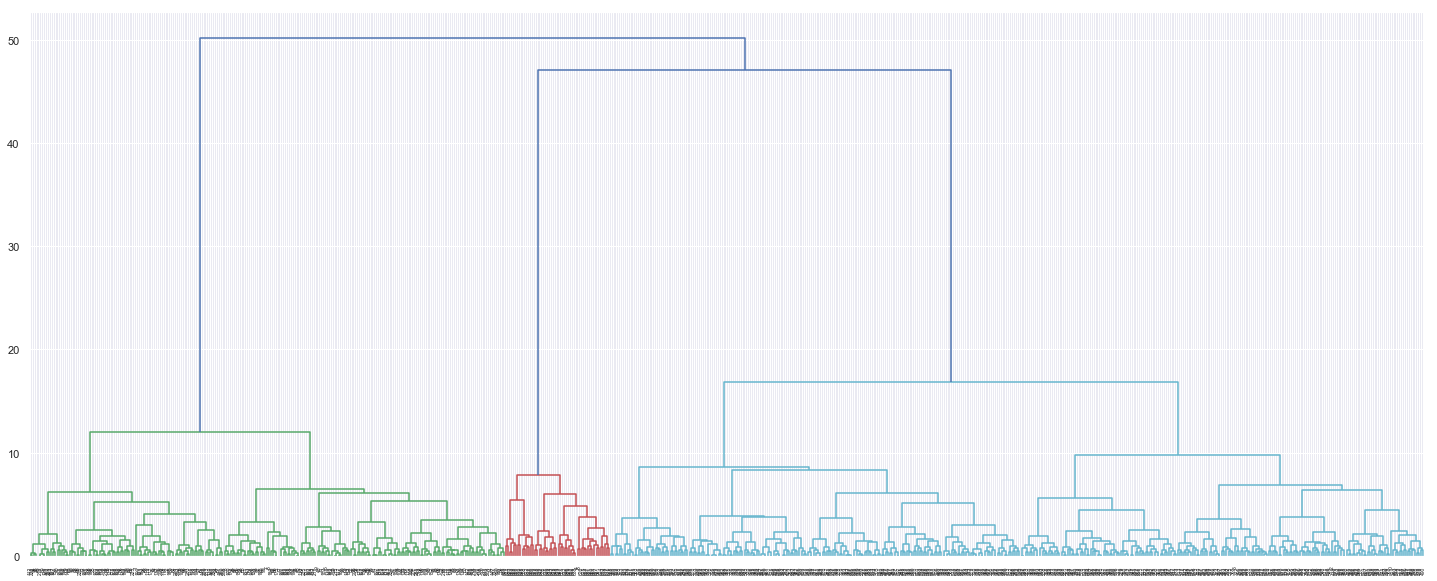

In [43]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

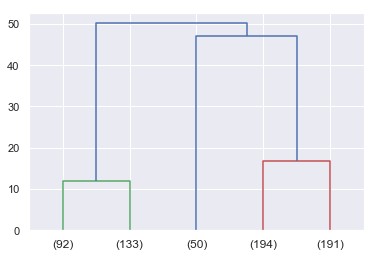

In [44]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at last p merged clusters of the dendrogram
# for 5 clusters

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

### There seems to be a good distribution between clusters

In [45]:
max_d = 10

In [46]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([5, 1, 5, 5, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 4,
       4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 4, 5, 4,
       4, 5, 2, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,

In [47]:
card_data_scaled["group"] = clusters

In [48]:
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,5
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,5
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,5
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EA84D49F28>,
      dtype=object)

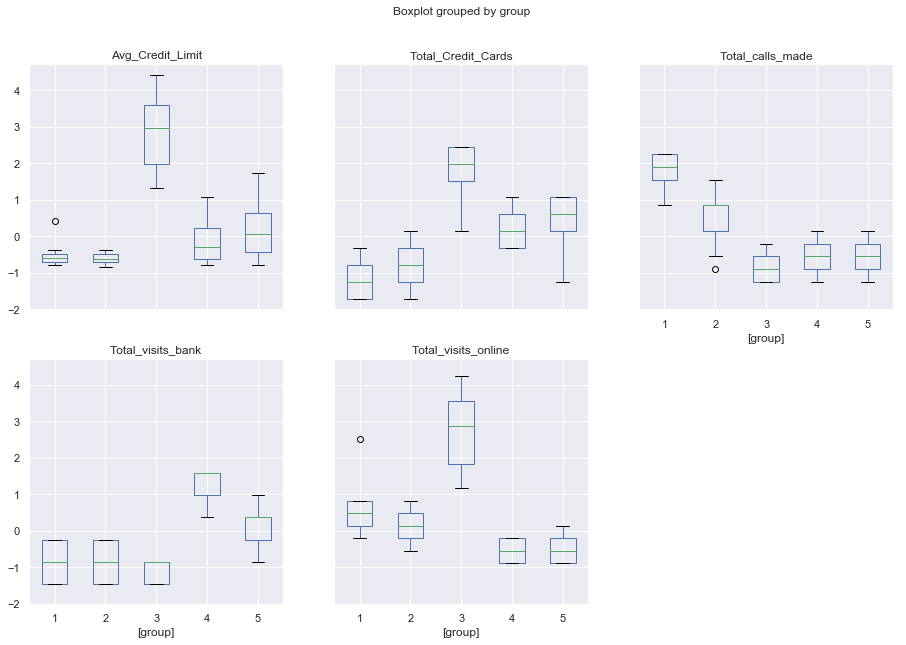

In [49]:
card_data_scaled.boxplot(by = 'group',  layout=(2,3), figsize=(15, 10))

### We observe a similar trend to what we saw with K-Means clustering with satisfactory online visits but room for improvement in call service

### Let's try out other linkage metrics and compare

In [50]:
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,5
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,5
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,5
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,3


In [51]:
card_data_scaled = card_data_scaled.drop('group', axis=1)
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [52]:
# average linkage method

Z = linkage(card_data_scaled, 'average', metric='euclidean')
c, coph_distance = cophenet(Z, pdist(card_data_scaled))
c

0.8977080867389372

### We observe a high correlation coeffecient

In [53]:
### Let's also have a look at complete linkage metric

In [54]:
# complete linkage method

Z = linkage(card_data_scaled, 'complete', metric='euclidean')
c, coph_distance = cophenet(Z, pdist(card_data_scaled))
c

0.8599730607972423

### Higher correlation coefficient than with 'ward' method but lesser than with 'average' method

### So let's go with the average linkage

In [55]:
# average linkage method

Z = linkage(card_data_scaled, 'average', metric='euclidean')
c, coph_distance = cophenet(Z, pdist(card_data_scaled))
c

0.8977080867389372

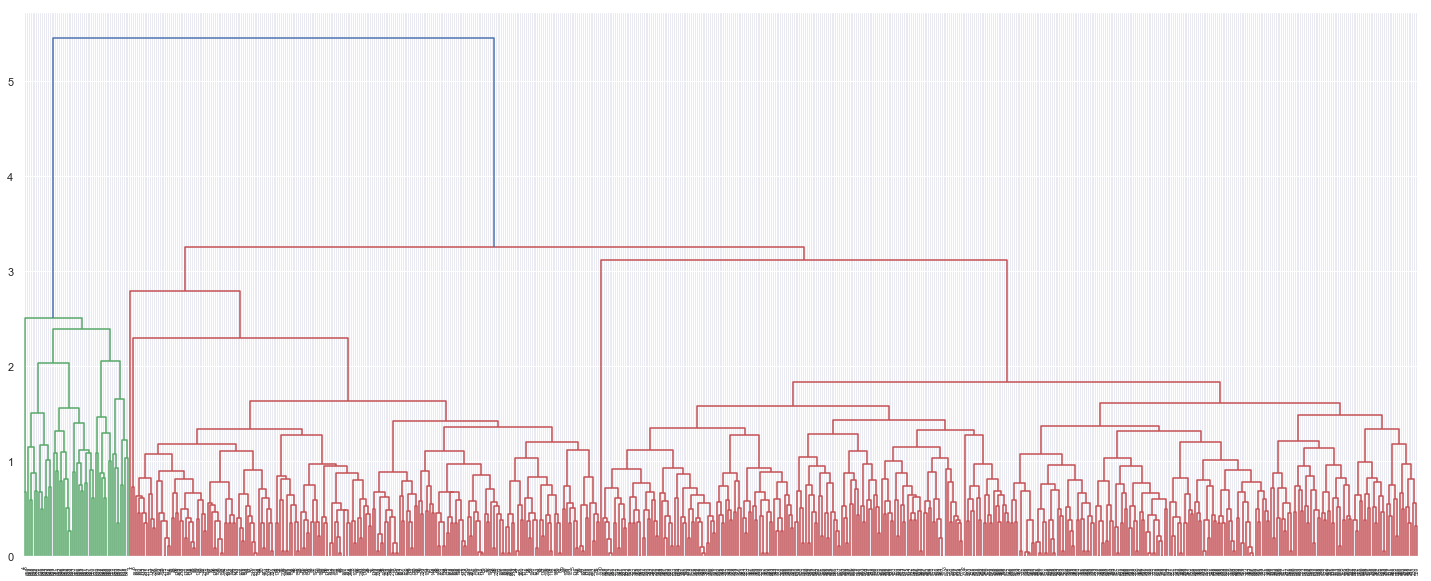

In [56]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

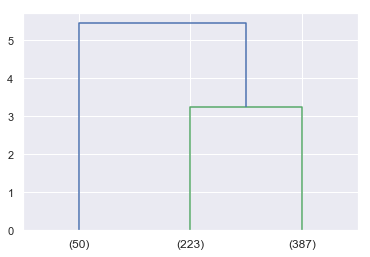

In [57]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at last p merged clusters of the dendrogram
# for 3 clusters

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### Let's start simple and try with 3 clusters

In [58]:
max_d = 3.2

In [59]:
clusters1 = fcluster(Z, max_d, criterion='distance')
clusters1

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [60]:
card_data_scaled['group'] = clusters1

In [61]:
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,3
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,3
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EA84AC02B0>,
      dtype=object)

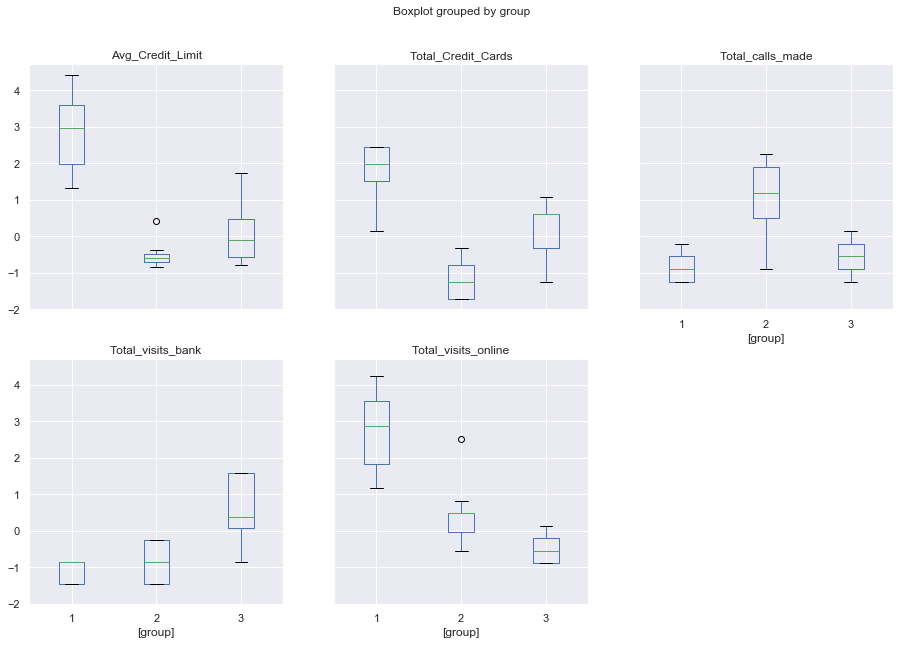

In [62]:
card_data_scaled.boxplot(by = 'group',  layout=(2,3), figsize=(15, 10))

### Here again we get to see

Cluster 2 with customers having made large number of calls has the lowest average credit card limit and lowest number of cards

Cluster 1 with the largest number of online visits from customers has a high average credit card limit and number of cards 

### Let's try with 4 clusters now

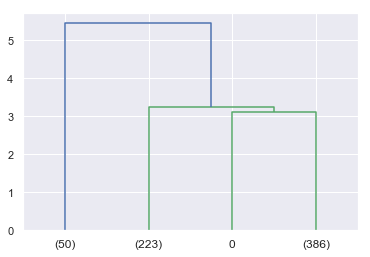

In [63]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at last p merged clusters of the dendrogram
# for 4 clusters

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

We observe an exception in the data classified as a seperate cluster. This would not be sufficient data to draw inference from that cluster

In [64]:
max_d = 3.1

In [65]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([4, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [66]:
card_data_scaled['group'] = clusters

In [67]:
card_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,4
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,3
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,3
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EA82C36C88>,
      dtype=object)

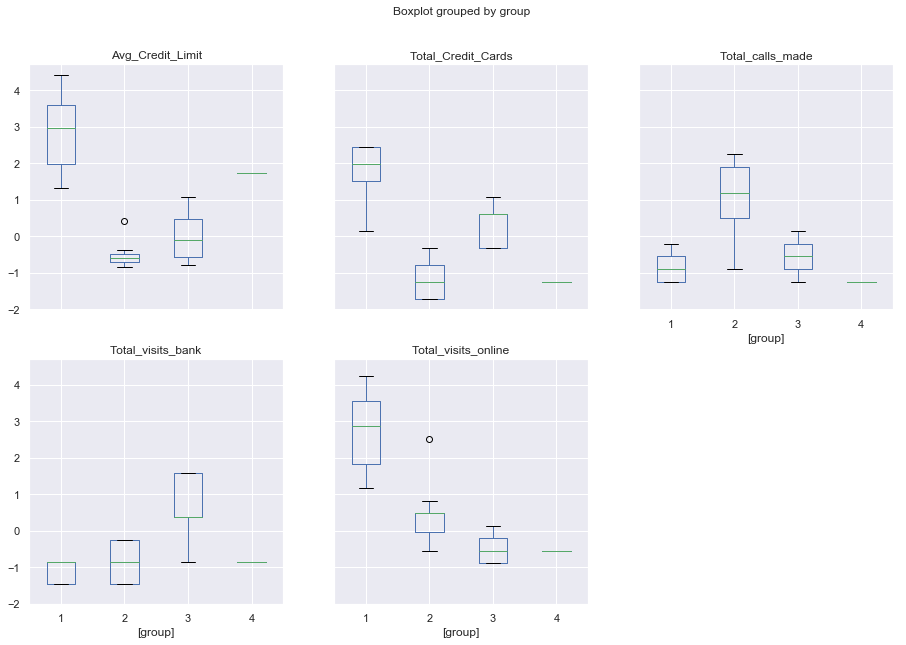

In [68]:
card_data_scaled.boxplot(by = 'group',  layout=(2,3), figsize=(15, 10))

The exception among the datapoints can be seen to be classified as a seperate cluster

So, we shall stick with our observations using 3 clusters

### Finally, lets observe if we have a similar case of a few exceptions in the data with increase in cluster size to 5

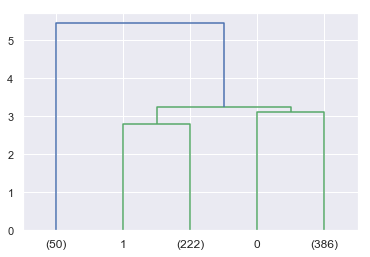

In [69]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at last p merged clusters of the dendrogram
# for 5 clusters

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

### We can see here again the few data points which are clssified as exceptions in seperate clusters

### Therefore our observations with 3 clusters when using the average linkage seem to be consistent with:

### 5 clusters with ward linkage and 

### 3 clusters with K-means clustering

In [70]:
y = clusters1

message = "The average silhouette_score for 3 clusters is: {}"
print(message.format(round(silhouette_score(card_data_scaled, y), 2)))

The average silhouette_score for 3 clusters is: 0.54


### The overall results from both K-Means and Heirarchical clustering seem to suggest a model with 3 clusters:

1. There seems to be a good representation of the services provided to the customers which also included data on the Avergae Credit Card Limit and the number of credit cards

2. The distinction gives a good representation of the relation between each service provided and the average credit card limit, number of credit cards

3. The silhouette score for 3 clusters is the highest as well, suggesting again a clear distinction between the 3 clusters

### Note:

We need to take into consideration the number of data points in each cluster as the cluster with the largest number of online visits by customers has the highest average credit card limit and number of credit cards __but__ it has the fewest number of data points

The cluster with the largest number of calls made by customers on average seems to have the lowest average credit card limit and least number of credit cards

Finally, the cluster with the largest number of visits to the bank on average, has the largest number of data points and has a better average credit card limit, number of credit cards than the cluster with most calls made on average 

## Heirarchical clustering vs K-means clustering short summary

Heirarchical clustering has the obvious disadvantage of time complexity with the dendrogram requiring distances between each pair of individual data points

It does however give us a better insight into the clustering and helps us read into the different number of clusters through a single dendrogram

It is likely to give a more accurate split for the same number of clusters

K-means in our dataset and much larger datasets would be prefered though because of the time saved  

If we observe the 3 clusters in both K-Means and Heirarchical Clustering, we notice that the datapoints in each cluster are almost identical 

Therefore, K-Means gives us similar results in a reduced timeframe for the given dataset

The Elbow plot that we used for K-Means also gives us a good intuition into the most likely number of clusters

For, heirarchical clustering, besides the dendrogram the only way I could use for getting good intuition into the number of clusters was through the use of dendrogramic distance and the corresponding silhouette coeeficient

But that seems like a tedious process again in comparison to K-Means reading into different values of clusters and their silhouette coefficient all at once

## Key Questions

__1.How many different segments of customers are there?__

Broadly speaking, there are 3 distinct clusters which give a good relation between the type of service provided and the corresponding average credit card limit and number of credit cards

This also helps us address some of the areas of interest raised by the marketing team in terms of service provided and catering to existing customer needs

__2.How are these segments different from each other?__

These clusters largely differ in the type of service most provided and the range of average credit card limit, number of credit cards

Cluster with largest number of online visits have the fewest data points but the largest average credit card limit and number of credit cards. Cluster with largest number of calls made on average has a high number of data point but a low average credit card limit and a small number of credit cards on average

__3.What  are  your recommendations  to  the  bank  on  how  to  better  market  to  and service these customers?__

__For existing customers:__

There is room for improvement in the call service department with immediate action required.

Although with good average credit card limit and number of credit cards, customers who have accessed the online service are few. Therefore, more focus could be placed on improving the ease of accessibility to online portals of the banks for the customers with possible mobile apps for the same.

The largest number of datapoints are in the cluster with customers largely visiting the bank for service. While the results are satisfactory to an extent, there is room for improvement in terms of the number of credit cards and average credit card limit

__For new customers:__

The campaigns can focus on the quality of the service and the banking experience with references to the online page of the bank and customer reviews of those who used the online service

There could be an analysis into the type of response from the customers among different clusters, with respect to each type of service and compare

__Finally:__

A fair and more reliable clustering might require more datapoints with respect to online visits to give a good comparison between the different types of service provided